In [4]:
import pandas as pd

In [5]:
data= pd.read_csv("C:/Users/vishw/Downloads/Churn_Modelling.csv")

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Dropping columns which are not needed
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#Encoding categorical data
data= pd.get_dummies(data,drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='Exited', ylabel='count'>

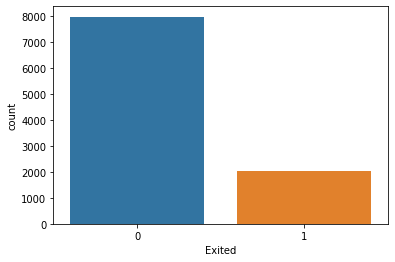

In [12]:
#Checking imbalanced data
sns.countplot(x=data['Exited'])

In [13]:
x=data.drop('Exited',axis=1)
y=data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [27]:
pip install -U imbalanced-learn

     -------------------------------------- 199.3/199.3 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
#handling data imbalances ( SMOTE oversampling technique)
from imblearn.over_sampling import SMOTE


In [15]:
res_x, res_y =SMOTE().fit_resample(x,y)

In [16]:
res_y.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [17]:
#Spliting dataset into Train set and Test set
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y=train_test_split(res_x,res_y, test_size=0.2, random_state=42)

In [18]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x = sc.transform(test_x) 

In [19]:
train_x

array([[-8.56112172e-01, -4.87876711e-04, -1.39332207e+00, ...,
        -5.72999687e-01, -4.63505575e-01,  1.18557544e+00],
       [ 1.08578435e+00,  9.97629185e-02, -1.39332207e+00, ...,
        -5.72999687e-01, -4.63505575e-01,  1.18557544e+00],
       [-1.45613638e+00,  2.70628359e+00,  7.71903601e-02, ...,
        -5.72999687e-01, -4.63505575e-01, -8.43472264e-01],
       ...,
       [ 1.91202804e-01,  2.00013714e-01,  1.18007468e+00, ...,
        -5.72999687e-01, -4.63505575e-01,  1.18557544e+00],
       [-8.15354712e-02,  3.00264509e-01,  4.44818468e-01, ...,
        -5.72999687e-01, -4.63505575e-01, -8.43472264e-01],
       [ 5.18488734e-01,  1.00202008e+00, -1.39332207e+00, ...,
         1.74520165e+00, -4.63505575e-01,  1.18557544e+00]])

In [20]:
#Training using Logistic Regression
from sklearn.linear_model import LogisticRegression
regr= LogisticRegression()
regr.fit(train_x,train_y)

LogisticRegression()

In [21]:
#Predicting using the model
pred_y=regr.predict(test_x)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y)

0.7893910860012555

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [24]:
precision_score(test_y,pred_y) #pc = TP/(FP+TP)

0.7749376558603491

In [25]:
recall_score(test_y,pred_y) #rc = TP/(TP+FN)


0.8003863490019317

In [26]:
f1_score(test_y,pred_y) #

0.7874564459930312

In [27]:
#confusion metrics
from sklearn import metrics

In [28]:
cm= metrics.confusion_matrix(test_y,pred_y)

In [29]:
print(cm)

[[1272  361]
 [ 310 1243]]


<AxesSubplot:>

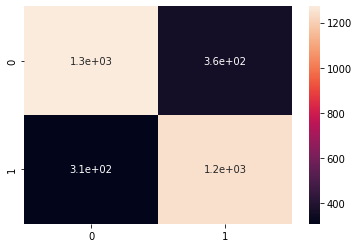

In [30]:
sns.heatmap(cm, annot=True)